In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandahouse
import hashlib
from scipy import stats
from read_db.CH import Getch # коннектор для подключения к БД
%matplotlib inline

In [11]:
data = Getch("""
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM simulator_20220520.feed_actions 
WHERE toDate(time) between '2022-04-17' and '2022-04-23'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
""").df

data.head()

,exp_group,user_id,likes,views,ctr
0,3,115383,11,36,0.305556
1,3,123580,15,92,0.163043
2,2,131473,26,148,0.175676
3,2,23985,12,66,0.181818
4,2,24523,17,120,0.141667


In [12]:
df.groupby('exp_group').count()

,user_id,likes,views,ctr
exp_group,,,,
2,8480,8480,8480,8480
3,8569,8569,8569,8569


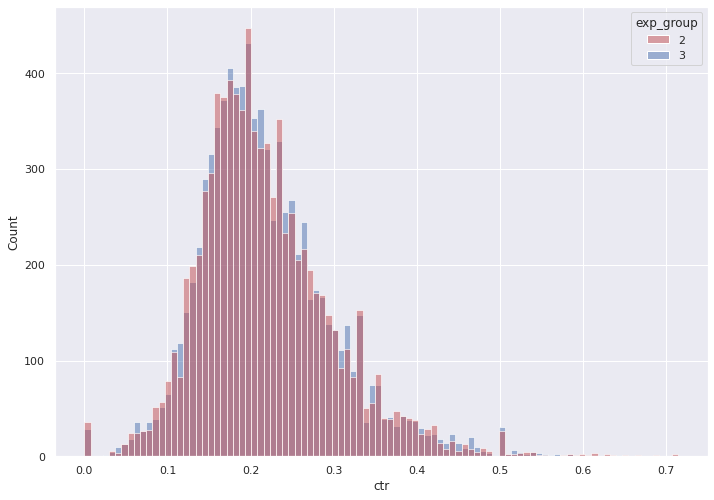

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Сделаем графики в seaborn покрупнее

groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

<AxesSubplot:ylabel='Count'>

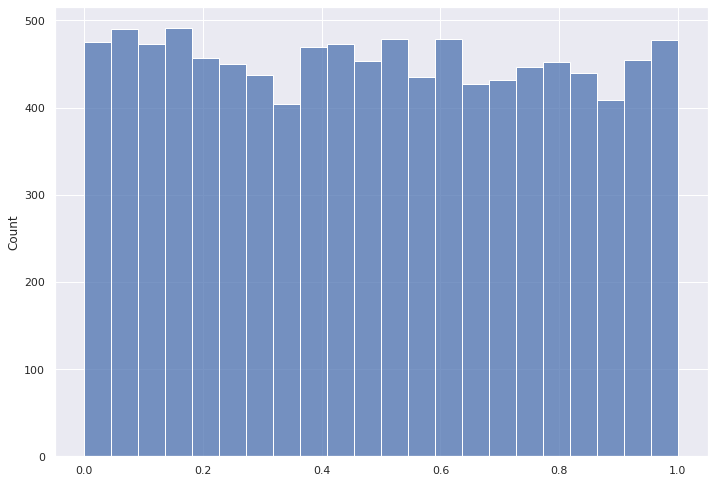

In [20]:
p_val = []

for i in range(10000): # симуляция АА-тестов
    sample1 = data[data.exp_group == 2].ctr.sample(500, replace = True).values
    sample2 = data[data.exp_group == 3].ctr.sample(500, replace = True).values
    p_val.append(stats.ttest_ind(sample1, sample2, equal_var = False)[1]) # сравниваем выборки t-тестом

sns.histplot(p_val) # гистограмма распределения получившихся 10000 p-values

In [21]:
sum(np.array(p_val) < 0.05) / 10000 * 100 # процент ложных срабатываний, когда p-value оказался меньше или равен 0.05

5.17

Можно сделать вывод по проведенному АА-тесту, что наша система сплитования работает корректно,
так как процент p-values, оказавшихся меньше либо равными 0.05, оказался приблизительно равен принятому нами уровню